<a href="https://colab.research.google.com/github/iamprashantjain/Machine_Learning/blob/main/1_Linear_regression_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple Linear Regression

#Intro

1. supervised ml model
2. when output column is numerical
3. there are 3 types of linear regression:

  + simple - works on single input & single output data
  + multiple - when input columns are more then 1
  + polynomial - when data is not linear

#How Linear Regression works?

+ lets say we have we to build a model which predicts the Package amount when user inputs CGPA.

+ simple approach would be to ask every student, take average & predict the average package amount but that wont be true in every case bcoz some students may have got good salary on lower cgpa or there may be other factors.

+ so we'll gather data & plot to see whether data is sort of linear or not

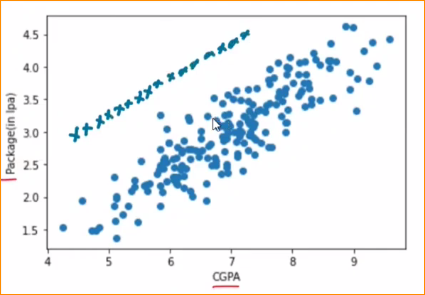

bcoz in real world, data will never be linear, it can be "sort of linear" bcoz it depends on lot of factors

+ if data would have been perfectly linear, we can draw a line which passes through all the data points & put it into formula of line:

  - y = m(x) + b
  - where m is slope (angle between x & y axis) & b is eucleadean distance from y axis

+ but since data is not linear, we can still draw a "Best Fit" line which passes closely through all points meaning it will find that value of m & b which will draw that line which will pass closely through all points

+ Thats what we do in simple regression, we check if data is linear or not. If its sort of linear then we try to draw a best fit line which passes closesly through the data points by finding those values if m & b.



#Code implimentation

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/placement.csv")

In [ ]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package')

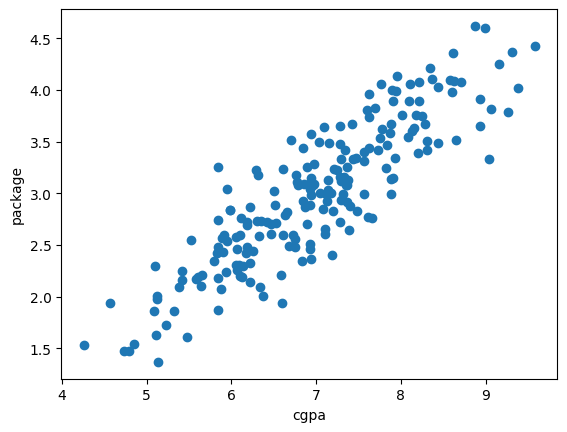

In [ ]:
#plotting a scatter plot to visualize if data is linear or not

plt.scatter(df['cgpa'], df['package'])
plt.xlabel('cgpa')
plt.ylabel('package')

In [ ]:
#since data is linear
#so we'll apply linear regression algorithm

In [ ]:
#seperating X (input) & y (output)

X = df.iloc[:, 0:1]
y = df.iloc[:, -1]

In [ ]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [ ]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [ ]:
#train test split
#to hide some data from model
#which can be used later to training performance

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#test size is 0.2 means 20% data for testing & 80% data for training
#random state to reproduce this result

In [ ]:
#applying algorithm
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
#train model on data
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# creating a dataframe of test data to test algorithm

data = {
    'cgpa': X_test['cgpa'],
    'package': y_test
}

df_test = pd.DataFrame(data)
df_test.sample(5)

,cgpa,package
12,8.94,3.65
199,6.22,2.33
45,7.87,3.58
78,6.59,2.21
112,8.58,4.10


In [ ]:
#testing the prediction

# lr.predict(X_test.iloc[1].values.reshape(1, 1))

lr.predict([[7.20]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.12114229])

+ As we can notice that results are not perfect.

Text(0, 0.5, 'package')

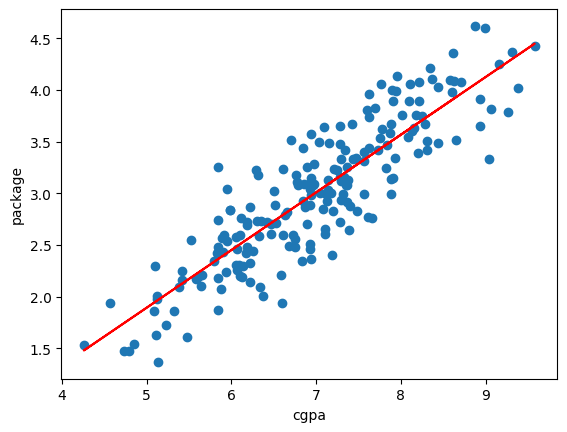

In [ ]:
#lets see the best fit line which was drawn by linear regression

plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.xlabel('cgpa')
plt.ylabel('package')

In [ ]:
#since linear regression drawn a line, it means it must have found the best value of m & b

m = lr.coef_
b = lr.intercept_

print(f"m:{m}, b:{b}")

m:[0.55795197], b:-0.8961119222429144


In [ ]:
#line formula
#y = mx + b

y = (m * 7.20) + b
print(y)

[3.12114229]


In [ ]:
#now even if cgpa value is not in the data
#then also you can get the package value

y = (m * 100) + b
print(y)

[54.89908542]


#Intution

+ y = (m * x) + b
+ package = (m * cgpa) + b

+ m denotes the weightage, how much package depends upon cgpa bcoz thats a slope, if slope will be lower then its change will change package lesser then if slope is higher.

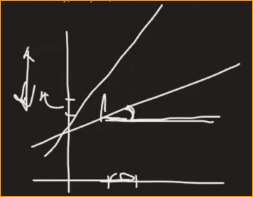

+ b is offset, so when m * cgpa value will become 0, still package will have some value & thats b

#How to find m & b

+ In linear regression, we check if data is linear then we draw a line which passes closely through all data points means with least possible eucladian distannce, once that line is drawn then we can easily find the value of y-axis which is package when we have a new query of x-axis.

+ In order to draw the line we need to find the best fit line, we need the value of m & b, y = mx + b

+ there are 2 way by which we can find the value of m & b
  1. closed form technique (using mathematical formula: OLS)
  2. non closed form (Approximation based technique using probabilities etc: Gradient Descent)

+ when working with lower dimensions we can use OLS & scikit learn linear regression internally uses this technique

+ when working with higher dimension, we use Gradient Descent bcoz deriving the value of m & b will be very difficult. In scikit learn there is a class called SGD Regressor which uses gradient descent techqnique

## OLS Method

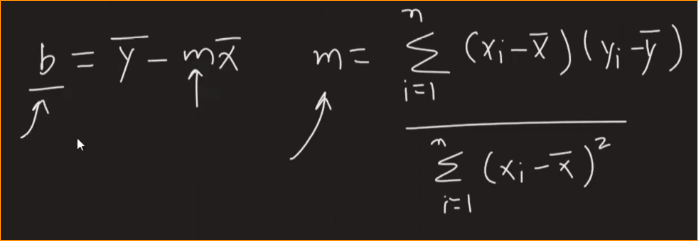


+ xbar & ybar are mean values of x & y
+ xi & yi is current row's cgpa & package
+ so linear regression class of scikit learn uses aove formula to find the best values of m & b

##Maths Intuition
How above formula derived?

+ we'll plot a scatter plot on data we have & its sort of linear
+ We've to draw a best fit line
+ In order to find best fit line, we need to find the value of m & b
+ what is best fit line: A line which goes very closely from every data point, means a line which have minimum distance b/w line & data point

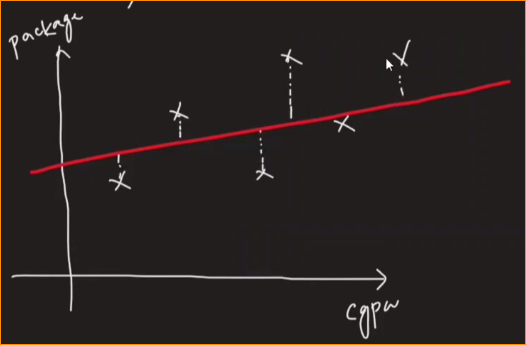

+ If it would have a perfectly linear data then line will go through each data point but since perfectly linear data is not possible so we'll find a "best fit line" which will go closely from each data point means a line which will have least possible distance b/w data & line.

+ to find the total error for each point b/w line & data:

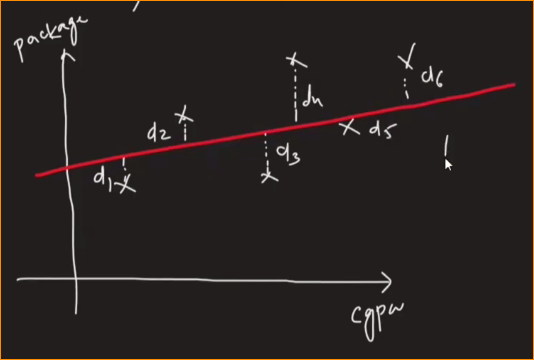

+ E = d1 + d2 + d3 + d4... + dn (where n is total no of points)

+ To avoid -ve values cancelling each other we'll take square of the distance so each distance will be +ve

+ E = d1² + d2² + d3² + .... + dn²

+ but why cant we do mod? bcoz..
  1. we need to penalize outliars
  2. since we need to do diffrentiation & mod graph is continous but not diffrentiable

+ E = d1² + d2² + d3² + .... + dn²
  we can write above as:
  - ∑i=1 to n di²
  - This is error function also called loss function also represented as J

+ now we want a value of m & b which will minize the value of above error function


+ further decomposing abve error function di:

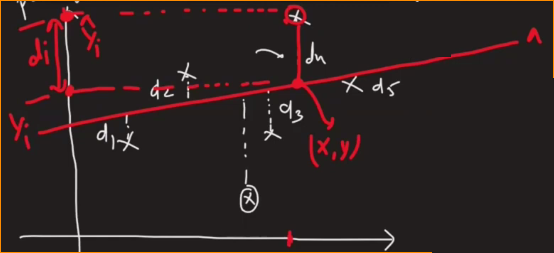

+ since di the distance b/w actual vs predicted meaning yi - yi^ so it can be written as:

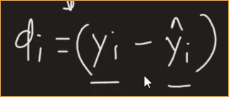


+ so the formula will now become:

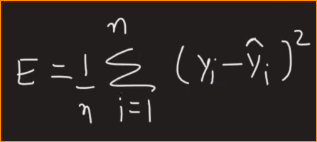

+ 1/n is to find average error, but we'll take total error:

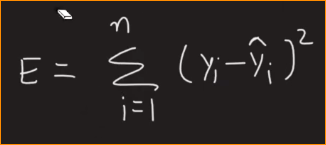


+ so we need to find a line (value of m & b) which will minimize the value of above formula

+ but where is m & b in above equation?

+ how will you find the value of yi^? using line equation:
  yi^ = mxi + b

+ replace in the formula:

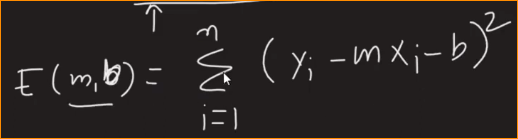

+ In order to switch to another line in a 2d space, what we do? we either move line up or down or change the angle which is nothing but m & b


+ How the value of E will change when changing the value of either m or b alone.

+ changing value of m & keeping b = 0

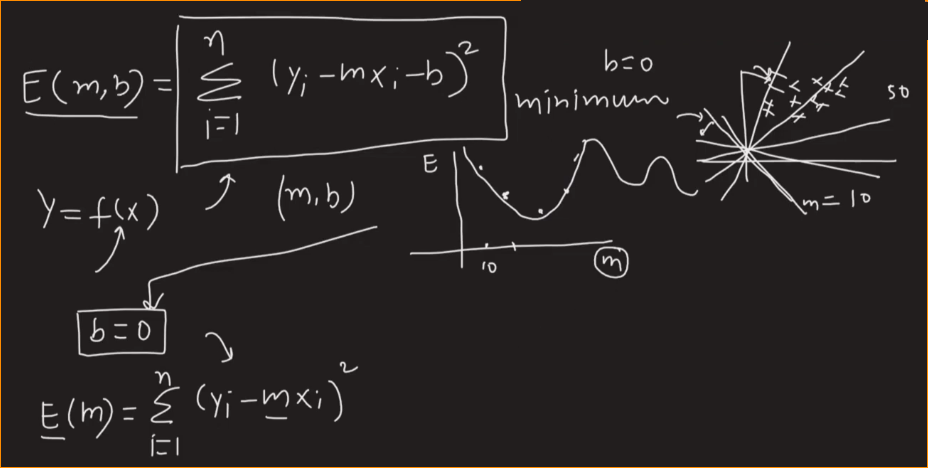

+ changing value of b & keeping m = 1

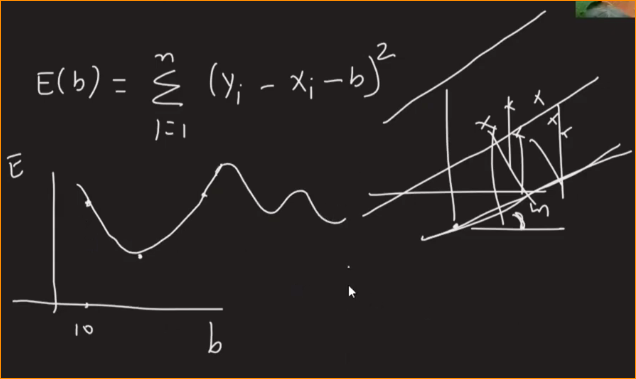

+ now changing both the values together

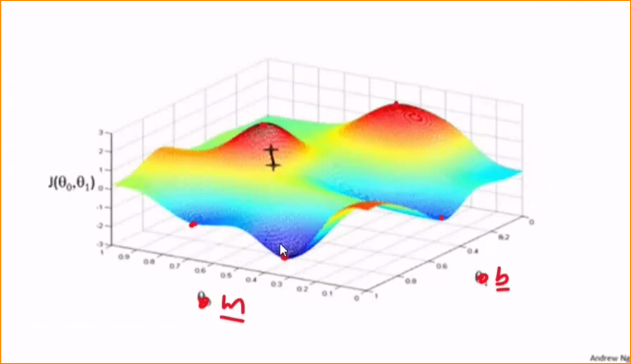

+ for some values of m & b error will be maximum & for some it will be minimum.. we need that value of m & b where error will value will be minimum

+ but how do we know what is maxima & what is minima?
by using concepts of maxima & minima in calculas

+ whenver we'll be at minima, slope will be 0

+ how to find slope? find derivative of error function & make it = 0
  so we'll find derivative of both with respect to m & b & make it = 0


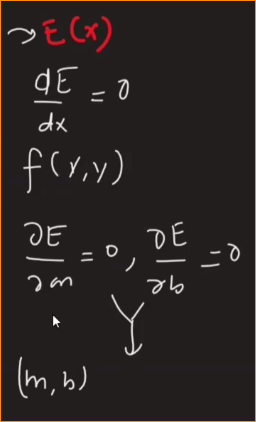

+ we'll get 2 equations of m & b, by solving them we'll get the value of m & b

+ so now we've to perform diffrentiation, make it equal to 0 & extract the values of m & b

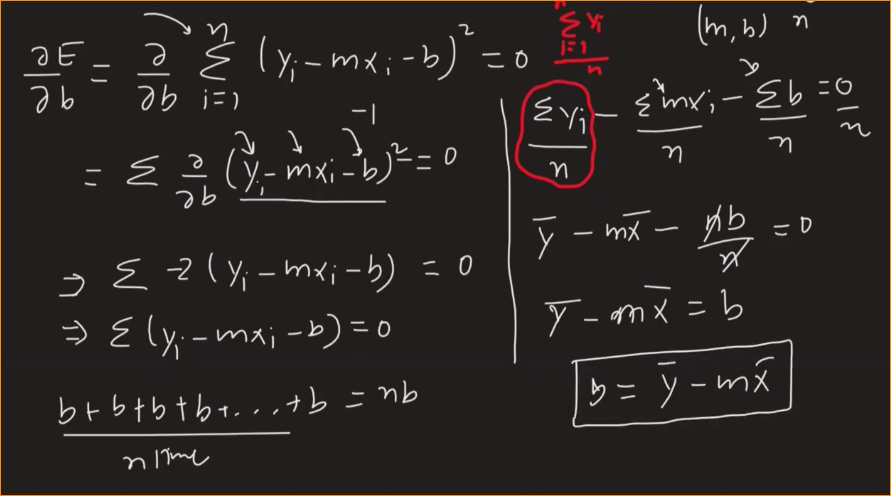

+
finding the value of m:









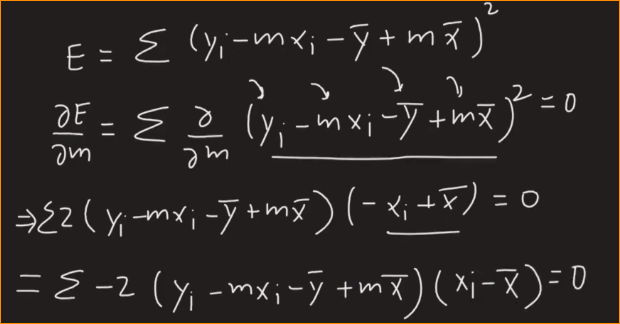
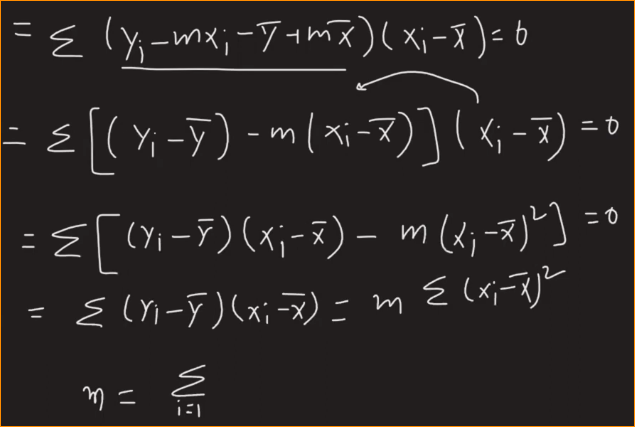
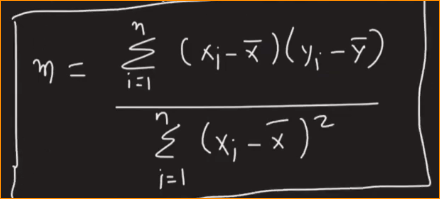

#Creating own python class for linear regression

In [ ]:
class MyLR():

  def __init__(self):
    self.m = None
    self.b = None

  def fit(self, X_train, y_train):

    num = 0
    den = 0

    for i in range(X_train.shape[0]):
      num = num + ((X_train[i] - X_train.mean()) * (y_train[i] - y_train.mean()))
      den = den + ((X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean()))

    self.m = num/den
    self.b = y_train.mean() - (self.m * X_train.mean())

    print(self.m, self.b)


  def predict(self,X_test):
    return self.m * X_test + self.b

In [ ]:
import numpy as np
import pandas as pd

df_test = pd.read_csv("/content/placement.csv")

In [ ]:
X = df.iloc[:,0].values
y = df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [ ]:
#testing my class

lr = MyLR()

In [ ]:
lr.fit(X_train, y_train)

0.5579519734250721 -0.8961119222429152


In [ ]:
X_test[0]

8.58

In [ ]:
lr.predict(X_test)

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

#Regression Metrics

+ How to know the efficiency of Algorithm?
+ How better it performed

## Types of metrics available to find model performance

1. MAE (mean absolute error)
2. MSE (mean squared error)
3. RMSE (root mean squared error)
4. R2 Score
5. Adjusted R2 score

##MAE

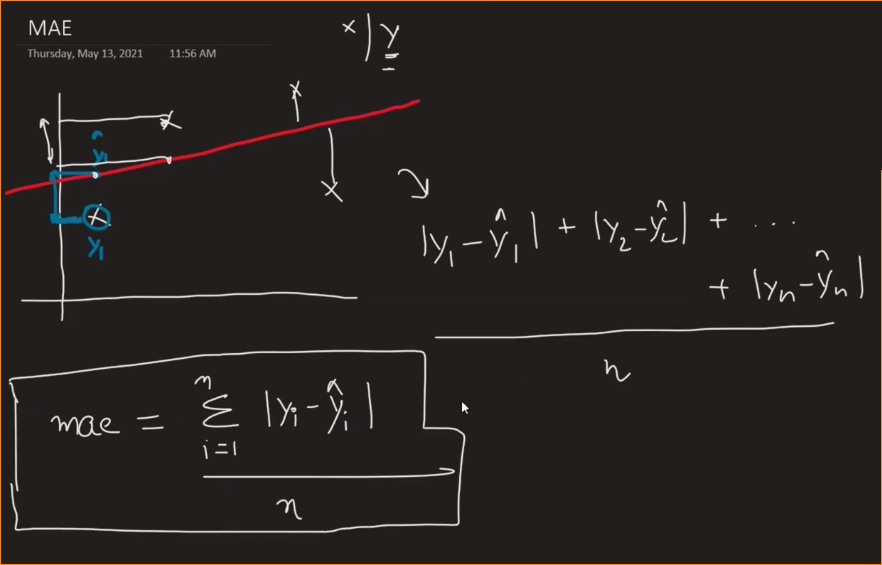

+ calcukating the difference b/w actual & predicted & taking a mean of it for all the points is MAE

+ our goal is to minimize this error

+ unit of MAE & Output is similar so it will easy to understand the loss in numbers for example in above data, Package unit is in lpa so 1.5
mae denotes a loss of 1.5lpa

+ can handle outliars

+ we use modulus when calculating the difference b/w actual & predicted, issue with that is.. its not diffrentiable so cant be optimized


##MSE

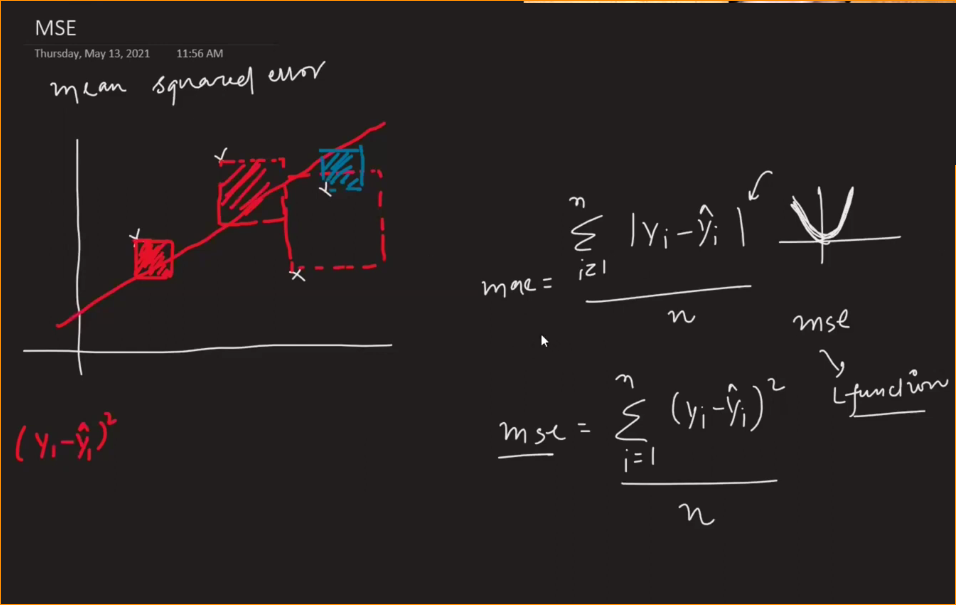

+ In mae we take modulus, but in mse we take square, thats the only difference

+ can be used as loss function bcoz its diffrentiable at all points

+ since we are taking square, its unit will also be in square to that of output which make it difficult to interpret

+ it penalizes outliars bcoz of "square", so if there are a lot of outliars then we should go with MAE otherwise with less outliars we can go with MSE

##RMSE

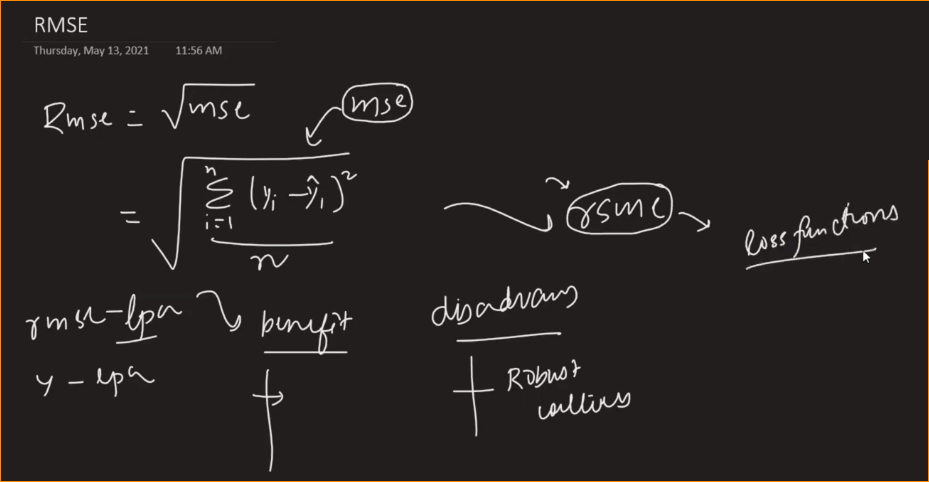

+ Its nothing but root of MSE
+ Its unit though is same as of output since we're taking a root
+ all properties remains the same as of MSE

## Above 3 are loss functions vs R2 score & Adjusted R2 score

+ above 3 depends on the context, sometime it could be more & sometime it could be less like in case of death prediction any greater then 0 will be more vs when predicting loss we can decide a threshold which could be atleast more then 0

+ whereas r2 score & adjusted r2 score are independent, It give actual performance in percentage

## R2 score

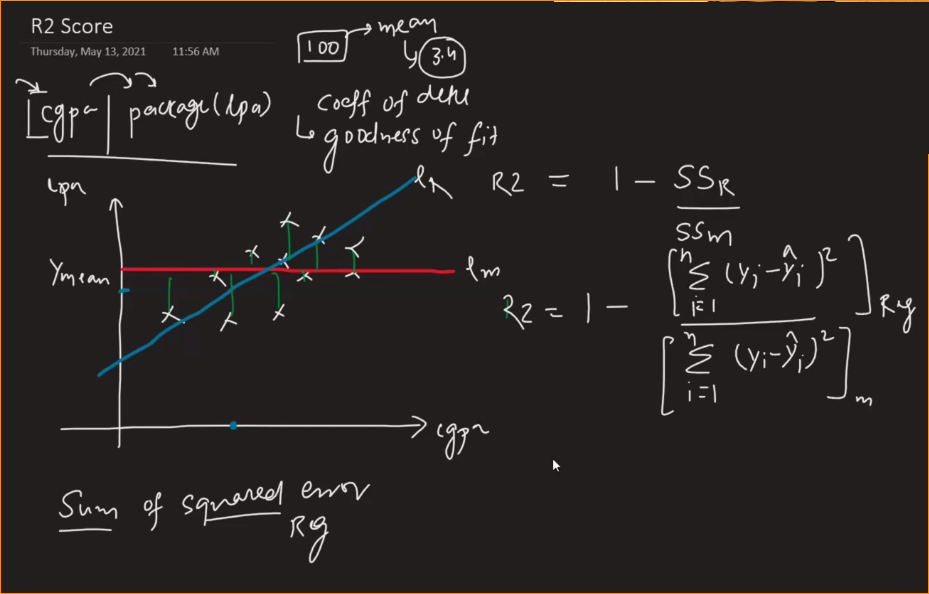

+ lets take an example of our data with cgpa & package, in worst case when somebody asks about how much my package could be? you'll calculate the mean & tell them

+ but since we have another column, cgpa, so we draw a best fit line, tell them according to cgpa

+ In r2 score, we calculate how better best fit performed in comparison to the worst case "mean" technique stated above

### Interpretation

+ when r2 score is 0, It means SSR/SSM is = 1, It will only be equal to 1 when best fit line is same as mean line meaning regression line is making same mistakes as mean line which means its not able to take any beefit of cgpa, so it means its worst performing model

+ when r2 score is 1, it means SSR/SSM is = 0, it can only be 0 when num is = 0 means best fit line is passing through every data point, its perfect line.

+ If r2 score is close to 1 (e.g., 0.95), it suggests that your model is doing an excellent job of capturing and explaining the patterns in the data, and it makes highly accurate predictions.

+ If r2 score is close to 0 (e.g., 0.05), it suggests that your model is not explaining much of the variance in the dependent variable, and its predictions are not very accurate.

+ r2 score -ve means, SSR/SSM is > 1, means num > den, means best fit line is even worst then mean line

+ r2 score is 0.8 or anything +ve means this amount of variance in output is being explained by input columns, rest cant be explained

##Adjusted R2 score

+ Problem with r2 score is as no of columns increases, r2 score also increases as they are able to explain the variance more

+ sometime r2 score also increases or stay uneffected even if data have irrelevant columns, whereas it should decrease

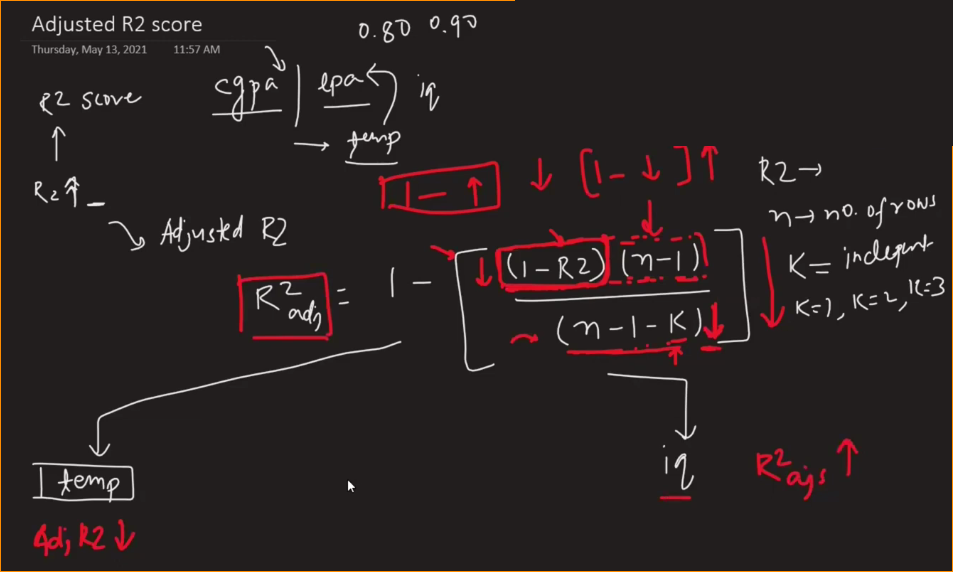

+ when we add irrelevant column like temp, denominator will decrease, in num, n-1 will stay constant & r2 score may remain constant or may decrease a little but in both cases, which means num will also decrease therby it will increase the fraction term & when substracted by 1, it will decrease

+ when we add relevant column like cgpa, denominator will decrease surely, r2 score will increase rapidaly but since substracting by 1, it will decrease faster then denominator, whole fraction term will go down, hence when substracting from 1, adjusted r2 score will increase.

##Code implimentation of all metrics

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [44]:
df = pd.read_csv("/content/placement.csv")

In [45]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package')

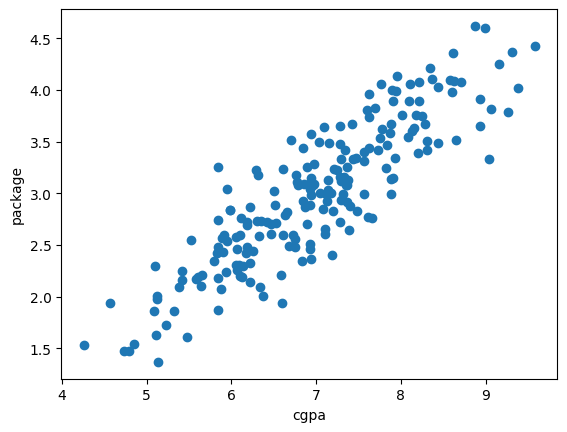

In [46]:
#plotting a scatter plot to visualize if data is linear or not

plt.scatter(df['cgpa'], df['package'])
plt.xlabel('cgpa')
plt.ylabel('package')

In [47]:
#since data is linear
#so we'll apply linear regression algorithm

In [48]:
#seperating X (input) & y (output)

X = df.iloc[:, 0:1]
y = df.iloc[:, -1]

In [49]:
#train test split
#to hide some data from model
#which can be used later to training performance

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#test size is 0.2 means 20% data for testing & 80% data for training
#random state to reproduce this result

In [50]:
#applying algorithm
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [51]:
#train model on data
lr.fit(X_train, y_train)

LinearRegression()

In [52]:
#testing the prediction

# lr.predict(X_test.iloc[1].values.reshape(1, 1))

lr.predict([[7.20]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.12114229])

Text(0, 0.5, 'package')

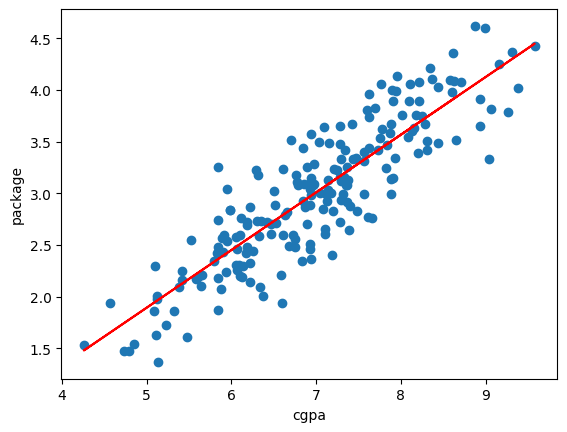

In [55]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.xlabel('cgpa')
plt.ylabel('package')

### checking metrics

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [59]:
y_pred = lr.predict(X_test)
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [60]:
y_actual = y_test.values
y_actual

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [67]:
print(f"MAE:{mean_absolute_error(y_actual, y_pred)} lpa")

MAE:0.2884710931878175 lpa


In [69]:
print(f"MSE:{mean_squared_error(y_actual, y_pred)}")

MSE:0.12129235313495527


In [68]:
print(f"RMSE:{np.sqrt(mean_squared_error(y_actual, y_pred))} lpa")

RMSE:0.34827051717731616 lpa


In [72]:
r2 = r2_score(y_actual, y_pred)
r2_percentage = r2 * 100

print(f"R2 Score: {r2_percentage:.2f}%")

R2 Score: 78.07%


In [74]:
r2 = r2_score(y_actual, y_pred)
n = len(y_actual)
num_features = 1  #no of columns: k

adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - num_features - 1))
adjusted_r2_percentage = adjusted_r2 * 100

print(f"Adjusted R2 Score: {adjusted_r2_percentage:.2f}%")

Adjusted R2 Score: 77.50%
